In [1]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

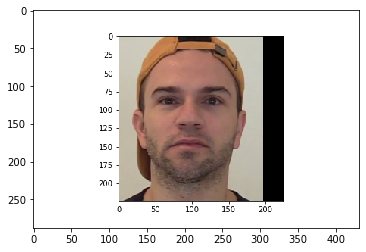

In [2]:
# folder_loc='eyeblink data labels/data/Feature1_data/'

# adohdulfwb5.png - 34, Man (should be Woman)
# adohdulfwb41.png  33, Man (should be Woman)
# adohdulfwb99.png  33, Man (should be Woman)

# bbbbbbbbbb0.png   29, Woman

# dddddddddd9.png   35, Man

# aaaaaaaaaa1.png - 30, Man

# dpevefkefv34.png  35, Man (should be Woman)

# eeeeeeeeee1.png   32, Woman

# novarhxpbj149.png 45, Woman

folder_loc='eyeblink data labels/data/temp/'
img_name='o.png'
img1_path = folder_loc+img_name
img1 = cv2.imread(img1_path)
plt.imshow(img1[:, :, ::-1 ]) 
plt.show() 

In [3]:
# dimensions=(152,152)
# resized=cv2.resize(img1, dimensions)
# cv2.imwrite(img_name, img1)
# plt.imshow(resized[:, :, ::-1 ])

In [4]:
# Facial Feature Analysis
# If you're running this for the first time, it will download 1.5GB in pretrained weights.
def detect_beard(image_dir):
    obj = DeepFace.analyze(img_path = image_dir, 
                           actions = ['age', 'gender'],
                           enforce_detection=False)
    print("   Age:", obj["age"])
    print("Gender:", obj["gender"])
    if (obj["age"]>=20 and obj["gender"]=='Man'):
        print("There appears to be an adult male. Beards are hard to deepfake.")

In [5]:
detect_beard(img1_path)

Action: gender: 100%|██████████| 2/2 [00:10<00:00,  5.50s/it]

   Age: 23
Gender: Man
There appears to be an adult male. Beards are hard to deepfake.


In [6]:
def detect_shades(image_dir):
    # load an image from file
    image = load_img(image_dir, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # load the model
    model = VGG16()
    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    print('%s (%.2f%%)' % (label[1], label[2]*100))

In [7]:
detect_shades(img1_path)

49152/35363 [=========================================] - 0s 0us/step
web_site (32.27%)
